In [90]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from nltk.stem.snowball import SnowballStemmer
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import *
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import re

In [91]:
df = pd.read_csv('text.csv')
df.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [92]:
df.shape

(416809, 3)

In [93]:
df.isnull().sum()

Unnamed: 0    0
text          0
label         0
dtype: int64

In [94]:
df.duplicated().sum()

np.int64(0)

In [95]:
df.rename(columns={'text': 'Text', 'label': 'Label'}, inplace=True)
df.drop('Unnamed: 0', axis=1, inplace=True)

In [96]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [97]:
sorted_label = ['Sadness', 'Joy', 'Love', 'Anger', 'Fear', 'Surprise']

In [98]:
for i, v in enumerate(sorted_label):
    df['Label'] = df['Label'].replace(i, v)

In [99]:
list(set(df.Label))

['Love', 'Sadness', 'Anger', 'Fear', 'Joy', 'Surprise']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_42852\3732966607.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=count.index, y=count.values, ax=axs[1], palette='viridis')


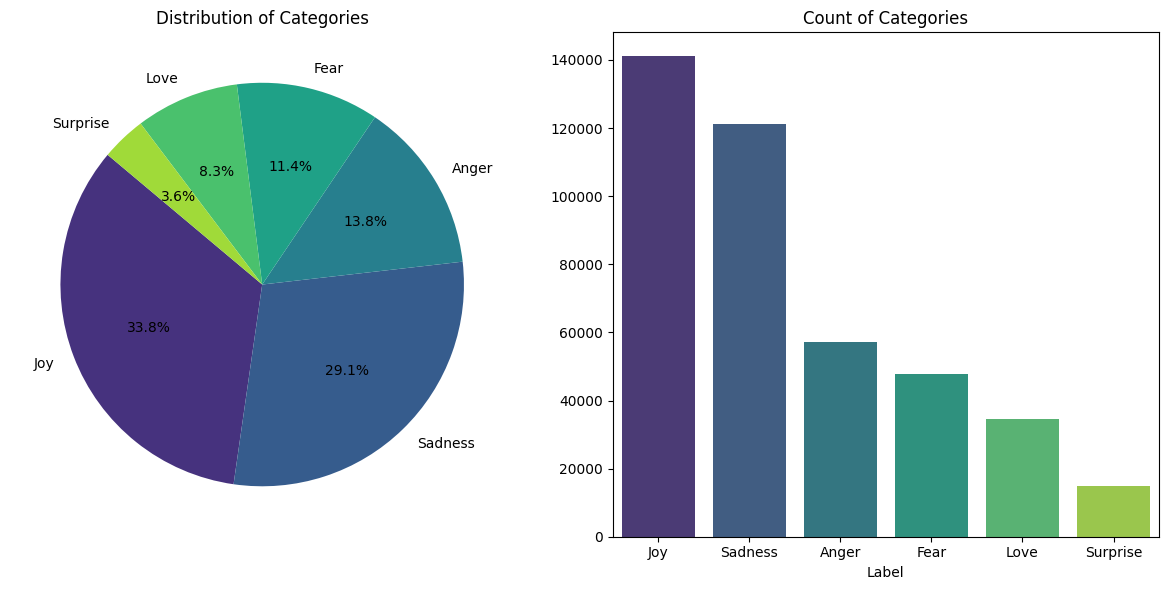

In [100]:
count = df['Label'].value_counts()

fig, axs = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')

palette = sns.color_palette('viridis')
sns.set_palette(palette)
axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Distribution of Categories')

sns.barplot(x=count.index, y=count.values, ax=axs[1], palette='viridis')
axs[1].set_title('Count of Categories')

plt.tight_layout()

plt.show()

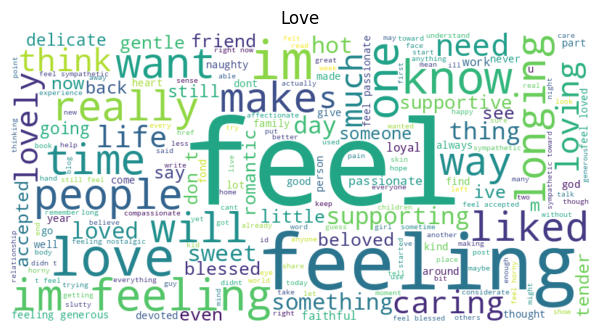

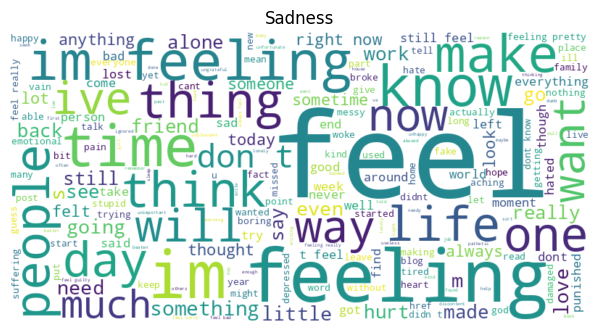

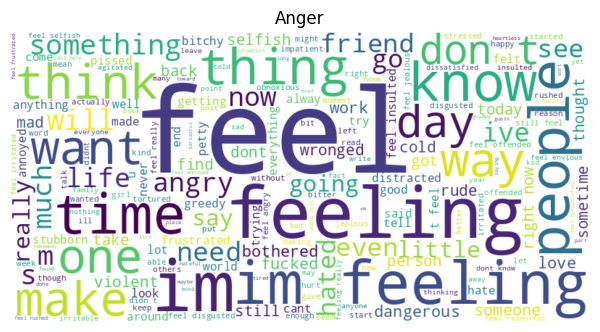

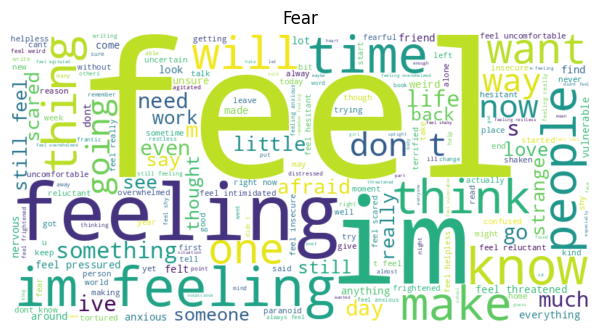

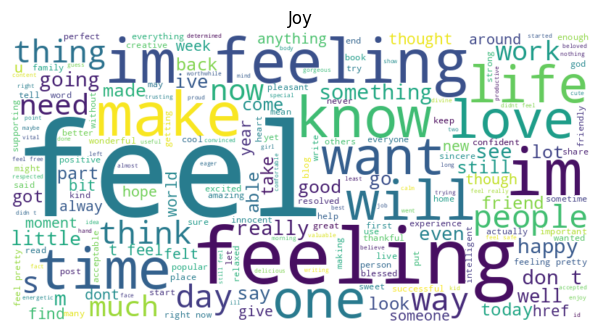

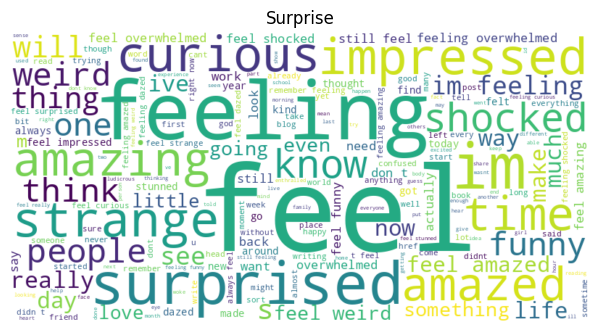

In [101]:
def generate_worlcloud():

    for i, v in enumerate(list(set(df.Label))):
        seperated = df[df['Label'] == v]
        combined = ' '.join(seperated['Text'])

        worldcloud = WordCloud(
            width=800, height=400, 
            background_color='white'
        ).generate(combined)

        plt.figure(figsize=(18, 9)) 

        plt.subplot(2, 3, i+1)
        plt.imshow(worldcloud, interpolation='bilinear')
        plt.title(v)
        plt.axis('off')

        plt.tight_layout()
        plt.show()

generate_worlcloud()

In [102]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,Fear
1,ive enjoyed being able to slouch about relax a...,Sadness
2,i gave up my internship with the dmrg and am f...,Fear
3,i dont know i feel so lost,Sadness
4,i am a kindergarten teacher and i am thoroughl...,Fear


In [103]:
for i, v in enumerate(sorted_label):
    df['Label'] = df['Label'].replace(v, i)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_42852\1675751533.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace(v, i)


In [104]:
df.head()

,Text,Label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [107]:
from nltk.corpus import stopwords

", ".join(stopwords.words('english'))

"a, about, above, after, again, against, ain, all, am, an, and, any, are, aren, aren't, as, at, be, because, been, before, being, below, between, both, but, by, can, couldn, couldn't, d, did, didn, didn't, do, does, doesn, doesn't, doing, don, don't, down, during, each, few, for, from, further, had, hadn, hadn't, has, hasn, hasn't, have, haven, haven't, having, he, he'd, he'll, her, here, hers, herself, he's, him, himself, his, how, i, i'd, if, i'll, i'm, in, into, is, isn, isn't, it, it'd, it'll, it's, its, itself, i've, just, ll, m, ma, me, mightn, mightn't, more, most, mustn, mustn't, my, myself, needn, needn't, no, nor, not, now, o, of, off, on, once, only, or, other, our, ours, ourselves, out, over, own, re, s, same, shan, shan't, she, she'd, she'll, she's, should, shouldn, shouldn't, should've, so, some, such, t, than, that, that'll, the, their, theirs, them, themselves, then, there, these, they, they'd, they'll, they're, they've, this, those, through, to, too, under, until, up, 

In [108]:
STOPWORDS = set(stopwords.words('english'))
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

df['Text'] = df['Text'].apply(lambda text: cleaning_stopwords(text))
df.head()


,Text,Label
0,feel really helpless heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feeling distraught,4
3,dont know feel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [109]:
import string

english_punctuations = string.punctuation
punctuation_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuation_list)
    return text.translate(translator)

df['Text'] = df['Text'].apply(lambda x: cleaning_punctuations(x))
df['Text'].tail()

416804    feel like telling horny devils find site suite...
416805    began realize feeling agitated restless would ...
416806    feel curious previous early dawn time seek tro...
416807    feel becuase tyranical nature government el sa...
416808    think spent time investigating surroundings th...
Name: Text, dtype: object

In [110]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

df['Text'] = df['Text'].apply(lambda x: cleaning_repeating_char(x))
df['Text'].head()

0                      fel realy helples heavy hearted
1    ive enjoyed able slouch relax unwind frankly n...
2               gave internship dmrg feling distraught
3                                   dont know fel lost
4    kindergarten teacher thoroughly weary job take...
Name: Text, dtype: object

In [112]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

df['Text'] = df['Text'].apply(lambda x: cleaning_numbers(x))
df.head()

,Text,Label
0,fel realy helples heavy hearted,4
1,ive enjoyed able slouch relax unwind frankly n...,0
2,gave internship dmrg feling distraught,4
3,dont know fel lost,0
4,kindergarten teacher thoroughly weary job take...,4


In [113]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df['Text'] = df['Text'].apply(tokenizer.tokenize)

df.head()

,Text,Label
0,"[fel, realy, helples, heavy, hearted]",4
1,"[ive, enjoyed, able, slouch, relax, unwind, fr...",0
2,"[gave, internship, dmrg, feling, distraught]",4
3,"[dont, know, fel, lost]",0
4,"[kindergarten, teacher, thoroughly, weary, job...",4


In [117]:
import nltk

st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text

df['Text'] = df['Text'].apply(lambda x: stemming_on_text(x))
df.head()

,Text,Label
0,"[fel, reali, helpl, heavi, heart]",4
1,"[ive, enjoy, abl, slouch, relax, unwind, frank...",0
2,"[gave, internship, dmrg, fele, distraught]",4
3,"[dont, know, fel, lost]",0
4,"[kindergarten, teacher, thoroughli, weari, job...",4


In [116]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

df['Text'] = df['Text'].apply(lambda x: lemmatizer_on_text(x))

df.head()

,Text,Label
0,"[fel, reali, helpl, heavi, heart]",4
1,"[ive, enjoy, abl, slouch, relax, unwind, frank...",0
2,"[gave, internship, dmrg, fele, distraught]",4
3,"[dont, know, fel, lost]",0
4,"[kindergarten, teacher, thoroughli, weari, job...",4


In [119]:
X = df.Text
y = df.Label

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
tokenizer.fit_on_texts(X_test)
X_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

In [120]:
maxlen = max(len(tokens) for tokens in X_sequences)
maxlen

79

In [121]:
X_padded = pad_sequences(X_sequences, maxlen=maxlen, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen, padding='post')

X_padded

array([[   22, 11748,    84, ...,     0,     0,     0],
       [  312,     5,   749, ...,     0,     0,     0],
       [    1,    50,   748, ...,     0,     0,     0],
       ...,
       [    1,   627,     0, ...,     0,     0,     0],
       [    4,    20,   482, ...,     0,     0,     0],
       [    1,   172,   847, ...,     0,     0,     0]],
      shape=(333447, 79), dtype=int32)

In [130]:
input_size = len(tokenizer.word_index) + 1
input_size

49495

In [131]:
model = Sequential()
model.add(Input(shape=[maxlen]))
model.add(Embedding(input_dim=input_size, output_dim=50, input_length=maxlen))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(120, return_sequences=True)))
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(GRU(64)))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\ASUS\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, 79, 50)         │     2,474,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 79, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_9 (Bidirectional) │ (None, 79, 240)        │       123,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_10                │ (None, 79, 128)        │       117,504 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 79, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_11                │ (None, 128)            │        74,496 │
│ (Bidirectional)                 │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,791,876 (10.65 MB)

 Trainable params: 2,791,620 (10.65 MB)

 Non-trainable params: 256 (1.00 KB)

In [132]:
history = model.fit(X_padded, y_train, epochs=5, batch_size=1500, validation_data=(X_test_padded, y_test))

Epoch 1/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 394s 2s/step - accuracy: 0.8005 - loss: 0.5216 - val_accuracy: 0.8665 - val_loss: 0.7006
Epoch 2/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.9185 - loss: 0.1696 - val_accuracy: 0.9175 - val_loss: 0.1778
Epoch 3/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9249 - loss: 0.1459 - val_accuracy: 0.9226 - val_loss: 0.1414
Epoch 4/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.9274 - loss: 0.1372 - val_accuracy: 0.9220 - val_loss: 0.1410
Epoch 5/5
223/223 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.9288 - loss: 0.1310 - val_accuracy: 0.9204 - val_loss: 0.1365


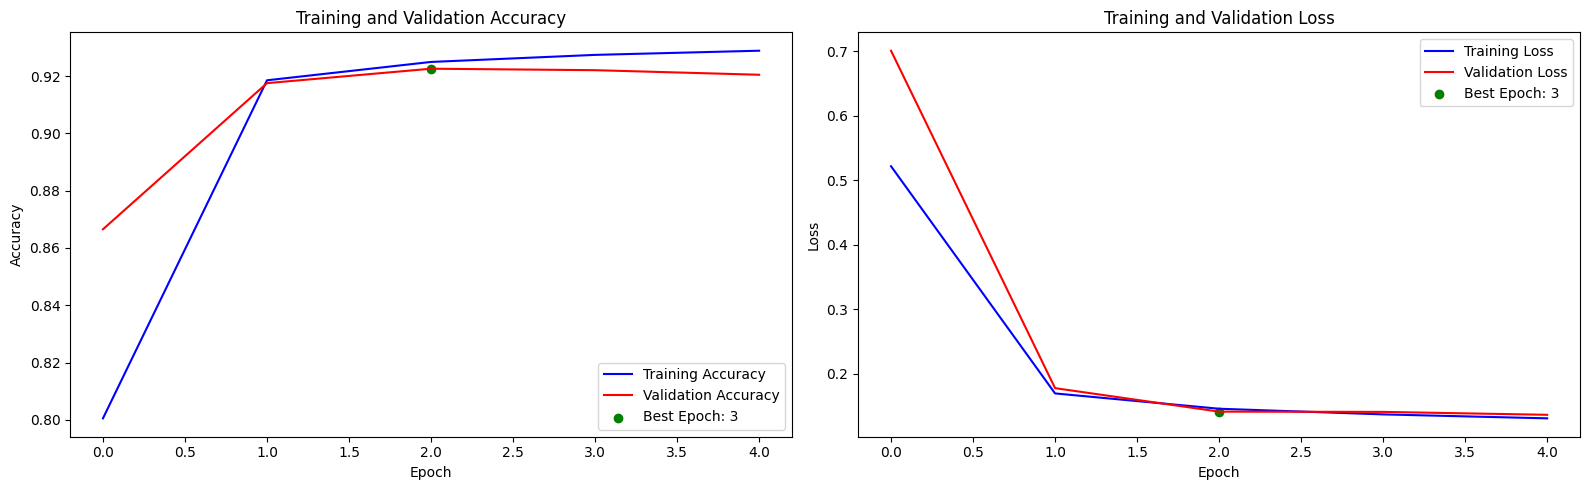

In [135]:
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch -1 ], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1 ], color='green', label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [136]:
model.evaluate(X_test_padded, y_test)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 47s 18ms/step - accuracy: 0.9204 - loss: 0.1365


[0.13652798533439636, 0.9204433560371399]

In [137]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test_padded)
y_pred = np.argmax(y_pred, axis=1)

2606/2606 ━━━━━━━━━━━━━━━━━━━━ 69s 26ms/step


<Axes: >

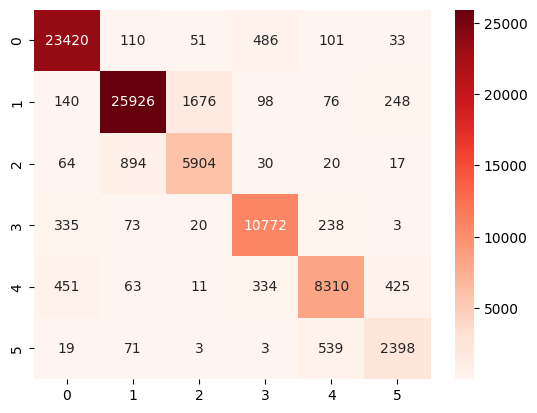

In [138]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Reds")